<a href="https://colab.research.google.com/github/OasisLead/Hello-world/blob/main/SD_credit_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **SD 201 PROJECT**


# **Introduction**

The question we will try to answer in this project is : How to detect credit card frauds ?



**Data set**


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

This data set contains most of the information that a Bank would have available on a transaction to detect if it is a fraud or not. One of the challenges of fraud detection is that the amount of information that you can gather on a single transaction is clearly limited.

This data set is interesting because it is realistic concerning the number of information for each transaction.

However, it contains only transactions done during 2 days. We could have more data ( more data is always better), but this quantity is sufficient to train a machine learning classification model and to gather enough correlations to make real inference. Moreover, having a restricted data set in time may be a good thing, because as the market and banking world evolves, data will naturally change, so we can't really count on old data to solve new problems. A realistic algorithm would have to update its parameters as the market evolves, and maybe, use transfer learning to adapt the old model ( trained on old data) to the new data. In this project we won't use transfer learning, and will focus on building a classification model from the 2 days data to detect future frauds.



To describe the data set more precisely, it contains only vectors of numbers. Each vector represents a credit card transaction.
The different attributes of the vectors are either simple information like time or amount, or they are private informations on the transaction, therefore having no real name ( They are called V1, V2, etc...). This may be a problem in case we want to interpret the models and the data. However, a bank would have access to the hidden labels and could interpret the impact of each feature on the model and on the class.
All features except class, time and amount are the result of a PCA transformation.
We have two labeled classes, fraud and non-fraud transactions.

**Goals**:

<ul>
<li> Understand the distribution of the data ( The role of each columns, correlations, differences beetween classes) </li>

<li> Pre-process the data set (normalization, outliers) and create a 50/50 sub-sample for classification which has as many fraud as non-fraud, and use oversampling to add more non-fraud data (To deal with the unbalanced set, we will also use cost-sensitive learning and compare different cost functions)</li>

<li> Choose the classifiers we are going to use, compare the classifiers and decide which one has a higher accuracy ( Choose beetween different classifiers and different parameters for each classifier), avoid overfitting with a validation set </li>

</ul>

Link of the dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download



# **Imported Libraries**

In [ ]:
import sklearn as sk
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import *

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.cluster import KMeans
import random as rd

# **Pre-processing**

In [ ]:
#Si vous avez le fichier en local

#df = pd.read_csv(open("creditcard.csv")) #-> Pour lancer la version locale
#df.dropna()




In [ ]:
#Si vous avez le fichier sur votre google drive sur GOOGLE COLAB

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv(open("/content/drive/MyDrive/creditcard.csv"))
df.dropna()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Analysis of the distributions of the columns "amount" (Amount of the transaction) and "time" ( Date of transaction)**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


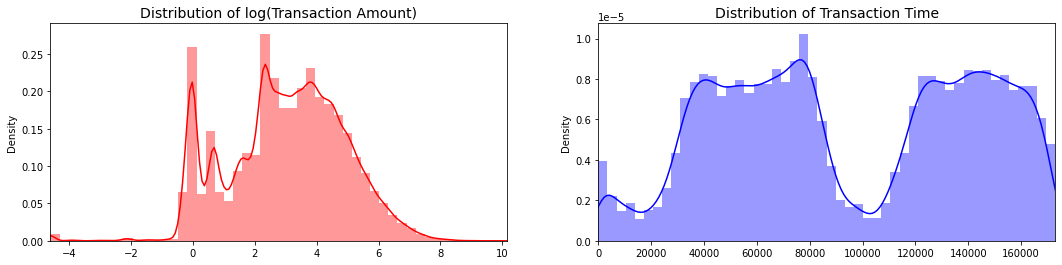

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

df_copy = df.copy()
df_copy = df_copy.drop(df_copy[df_copy['Amount'] == 0].index)
df_copy['Amount'] = df_copy['Amount'].apply(lambda x: log(x))
amount_val = df_copy['Amount'].values
time_val = df_copy['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of log(Transaction Amount)', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

We see than the distributions differ not only in variance and mean, but also by a large margin on their maximum and their minimum. To avoid some classification biases (For example the bias that consists in overestimating the impact of one parameter on the class), we will normalize our values in mean and variance.



**Correlation matrix**

In [ ]:
#Plotting each columns distributions for both classes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


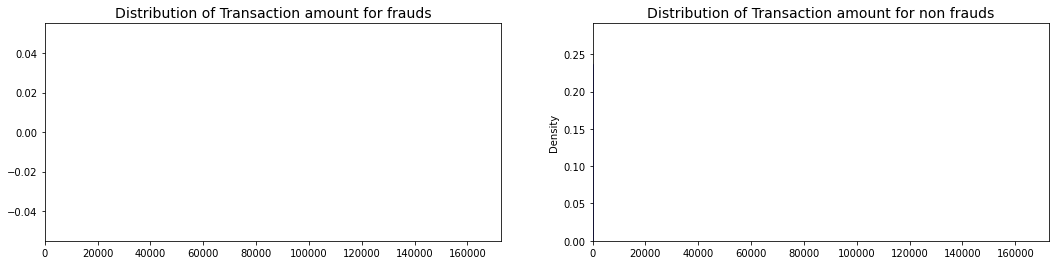

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

df_copy_1= df_copy.copy()
df_copy_1 = df_copy_1.drop(df_copy_1[df_copy_1['Class']==0].index)


df_copy = df_copy.drop(df_copy[df_copy['Class']==1].index)

amount_val_fraud = df_copy_1['Amount'].values
time_val_fraud = df_copy_1['Time'].values
amount_val_non_fraud = df_copy['Amount'].values
time_val_non_fraud = df_copy['Time'].values




sns.distplot(amount_val_fraud, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction amount for frauds', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val_non_fraud, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction amount for non frauds', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])





plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))






plt.show()

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)



We see that some variables are strongly correlated, especially to class, amount and time. This is logical since there was already a PCA for the columns V1..V28, as a result, they are not really correlated together but only to other columns

Moreover, some columns like V14, V12 and V17 are strongly correlated with the class, meaning that they will probably have a greater impact of the algorithms since they are linear algorithm mostly. ( Some algorithms may function in quadratic realms, but for example, Trees only consider inequalities)


It is hard to analyze the meaning of these correlations without having the names of the columns. In addition, we won't suppress any higly correlated column ( The only one is only V2 and Amount and it won't change the algorithm much).

**Scaling and subsampling**

In [ ]:
# Since most of our data has already been scaled in the original csv file,
# we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers (Imagine one super high value)

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))


df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']



df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are scaled

df.head()

Here, knowing that there is only 0.17 % of frauds (the data is highly imbalanced), if we keep for the training of our models the whole data, the score of the classifier will be naturally high because he will be biaised to detect non-frauds.
We don't want that. We want to specifically detect frauds and their particular structure. To do that, we are going to concatenate two subsets to make our training set. The first set will be the set of all frauds ( of size 492), and the second set the first 492 non frauds.

### SMOTE - Tomek Links method:

In [ ]:

#Là quelques trucs sont dans le désordres, genre le removal des outliers est après etc.. Parceque il dépend de l'ensemble
#qu'on prend
## With SMOTE-Tomek Links method which does both undersampling with Tomek Links and oversampling
# with SMOTE


from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

## With SMOTE-Tomek Links method


#
#Define X and Y, as well as training, validation and test

df_bis = df.copy()

df_bis = df_bis.sample(frac=1)

X = df_bis.drop('Class', axis=1)
y = df_bis['Class']



# Define model
model=RandomForestClassifier(criterion='entropy')
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

In [ ]:
## We take a sub set of the whole data

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
#non_fraud_df = df.loc[df['Class']==0].sample(frac=1, random_state = 18)[:492]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df

new_df.head()




In [ ]:
# Make sure we use the subsample in our correlation

f, ax2 = plt.subplots(1, 1, figsize=(24,20))



#Balanced data frame
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

####Analysis of the correlation matrix and removal of outliers

We can now see on the last line of the correlation matrix that some values have a higher (absolute) correlation with the class. This means that they will probably have a bigger influence on the learning algorithm than other classes ( even if for most algorithms non linear relations are also important). We also see that undersampling has changed the structure of the correlations. Indeed, Whereas before because of PCA most vectors where uncorrelated ( And not independant), now, lots are correlated.

As some features have a more important role in the detection of the class, we don't want the outliers of theses features to influence too much our results. As a consequence, for the three most correlated to the class features, we will remove their outliers.

In [ ]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

In [ ]:
X = new_df.drop('Class', axis=1)
print(X)
y = new_df['Class']
print(y)

In [ ]:
from sklearn.model_selection import train_test_split

# one part of the data is used for training and the other for testing ( 20% for testing )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
print(len(X_train))

X_test = X_test.values
print(len(X_test))

y_train = y_train.values
print(len(y_train))

y_test = y_test.values
print(len(y_test))


# **Classification and results**

Now that we have cleaned and processed our data, we will try to classify it using different estimators and comparing the results.

In [ ]:
# Here are the 5 classifiers that we will use

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter = 1000), #max_iter = 1000
    "KNearest": KNeighborsClassifier(),
    "randomforest":RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:

from sklearn.model_selection import cross_val_score
import time

for key, classifier in classifiers.items():




    start_time = time.time()


    #training_score = cross_val_score(classifier, X_train, y_train, cv=5)


    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)

    print(classifier.__class__.__name__ + "---t %s seconds ---" % (time.time() - start_time))

    #classifier.fit(X_train, y_train)
    score2 = classifier.score(X_train,y_train)
    score1 = classifier.score(X_test,y_test)



    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(score2, 2) * 100, "% accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of", round(score1, 2) * 100, "% accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a cross validation training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

We observe very high scores both on testing set and on cross validation or the training set.
We see that for the tree and the forest method, the algorithm was able to calculate the "perfect" model with 100% accuracy on the test set ( Also, cross validation really is only for score purpose since it does a copy of the model and doesn't change its parameters).
This mean that we could have better results on the test set by maybe limiting the "perfectness" of the trees to avoid overfitting. This could simply be done by limiting the size of the trees.
The problem of this data set is that it is really unbalanced, so we don't have that much data in the end when we consider the fraud case. Since we don't have much data, it is really easy to find the "perfect model" on our data, without really gathering any compressed representation of our data.
One way to solve this issue would be to change our training set, by adding data with oversampling, and by less reducing data by using a less harsh underfitting algorithm which leaves more data for training (For example, it would be 1/3 - 2/3 instead of half - half).

- "Training score" represents the score on the test data of the classifier fitted on the whole training data ( 80% of the 984 vectors).

- "Cross validation training score" uses the technique of cross training to train the data on a part of the training data and testing it on another part ( There are 5 parts).






In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

list_params = [2,3,4,5,6,7,8,9,10,20,50]


for max_depth in list_params:

    classifier = sk.tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    score2 = classifier.score(X_train,y_train)
    score1 = classifier.score(X_test,y_test)


    print("Classifiers: ", "tree of max depth", max_depth, "Has a training score of", round(score2, 2) * 100, "% accuracy score")
    print("Classifiers: ","tree of max depth", max_depth, "Has a testing score of", round(score1, 2) * 100, "% accuracy score")
    print("Classifiers: ", "tree of max depth", max_depth, "Has a cross validation training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,
                    special_characters=True,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('lolgameskills.png')
    Image(graph.create_png())








We can see on this example a clear example of overfitting. The more we inscrease the precision of our tree on the training score, the less it is precise on the test score.

However, we lack a validation set, because, as it is, if we take the best compromise of precision on test set and precision on training set, we have no real test set left as we are biaised with the test set.

### Cost sensitive learning

In [ ]:
IR = 0.17/99.83 # IR doit valoir le rapport entre le pourcentage de cas de fraude et le pourcentage de cas de non fraude
#Pour l'instant, il vaut 1, avec le undersampling qu'on a fait, mais si on fait la méthode SMOTE et le undersampling, on obtiendra
# un data set incomplet dont il faudra récuperer les pourcentages respectifs

class_weight={0:IR,1:1}

classifier = sk.tree.DecisionTreeClassifier(max_depth=5,class_weight=class_weight,random_state=0)

(results_df_dt_cost_sensitive, classifier_0, train_df, test_df) = kfold_cv_with_classifier(classifier,
                                                                         X, y,
                                                                         n_splits=5,
                                                                         strategy_name="Decision tree - Cost-sensitive")

fig_decision_boundary = plot_decision_boundary(classifier_0, train_df, test_df)

##**Finding the best hyperparameter**

To find the best hyperparameter, we are going to use the grid method. It is basically a method that optimises any combination of parameters by testing its particular score.

We will be testing different types of penalty function for our algorithms, different kinds of kernels for SVC, and different criteria and sizes for the tree.

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# The C parameter is the regulation parameter to avoid overfitting, much like the max depth for the trees

# Créer la liste des différents coefficients de fonction de cout associés pour chaque classe que l'on va tester
# et faire gaffe si ces coefficients sont bien adaptés à l'algo, ensuite, bien changer la fonction de score sur laquelle on évalue
# les algorithmes

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(max_iter = 1000), log_reg_params)
start_time = time.time()
grid_log_reg.fit(X_train, y_train)
print(classifier.__class__.__name__ + "---t %s seconds ---" % (time.time() - start_time))
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
start_time = time.time()
grid_knears.fit(X_train, y_train)
print(classifier.__class__.__name__ + "---t %s seconds ---" % (time.time() - start_time))
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
start_time = time.time()
grid_svc.fit(X_train, y_train)
print(classifier.__class__.__name__ + "---t %s seconds ---" % (time.time() - start_time))

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
start_time = time.time()
grid_tree.fit(X_train, y_train)
print(classifier.__class__.__name__ + "---t %s seconds ---" % (time.time() - start_time))

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

We weirdly find that some scores have decreased over this optimisation, whereas others have increased.

## **Evaluating more deeply our classifiers**

In this last part, we are going to compute the ROC curves and the confusion matrix to evaluate our classifiers. As well as their time efficiency for a real case use.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.


start_time = time.time()
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

print("log_reg_pred"+ "---t %s seconds ---" % (time.time() - start_time))


start_time = time.time()
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
print("knears_pred" + "---t %s seconds ---" % (time.time() - start_time))


start_time = time.time()
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")
print("svc_pred" + "---t %s seconds ---" % (time.time() - start_time))

start_time = time.time()
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
print("tree_pred" + "---t %s seconds ---" % (time.time() - start_time))

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

Pour conclure, nous retrouvons des bons resultats pour nous classifiers, toujours sans vraument comprendre d'où vient le score de 100%.

On aurait pu calculer nos scores différemment, par exemple en se concentrant particulièrement sur le taux de true positive et le taux de false negative qui sont les plus importants en cas de fraude bancaire.

De plus, il existe certaines méthodes spécifiques aux fraudes bancaires qui permettent de calculer en fonction de la probabilité assignée à la fraude, une fonction d'esperance qui calcule le coût pour la banque d'envoyer des experts après la détéction pour vérifier que c'est bien une fraude. C'est une fonction de performance avancée qui prendrait aussi en compte un flux discret de transaction et un certain nombre d'experts, les "ressources" de la banque pour aller chercher les fraudes.

Limites de notre méthode: